# OpenAI Gym Overview

I created this notebooks by coding along the following Udemy course by J. M. Portilla:

[Practical AI with Python and Reinforcement Learning](https://www.udemy.com/course/practical-ai-with-python-and-reinforcement-learning/learn/)

Have a look at the guide in this folder for more details on the theory and an overview on the contents of this folder:

`ReinforcementLearning_Guide.md`.

This notebook start exploring the OpenAI Gym library with the following games:

1. [Atari / Breakout](https://gym.openai.com/envs/Breakout-ram-v0/)
2. [Classic control / Mountain Car](https://gym.openai.com/envs/MountainCar-v0/)

Note 1: the RAM version can be used for the Atari game: the ball position and paddle location are obtained from `gym`.

Note 2: if we use Jupyter notebooks, sometimes we need to restart the kernel; an alternative is to use python scripts.

## 1. Atari Breakout Game

Popular Atari game in which we m ove paddle so that we hit a ball that collides agains a rainbow ball; collisions remove rainbow blocks (goal). If we miss hitting the ball, it falls down (avoid).

Note that an extra environment needs to be installed, along with `pygame`:

```bash
pip install 'gym[atari,accept-rom-license]'
pip install pygame
```

This section shows how to:
- Create simulation loops
- Render images or numpy arrays
- Access actions and execute them

In [17]:
import gym

In [18]:
# For plotting
import matplotlib.pyplot as plt
# For slowing down the game
import time

In [19]:
# Select a game/environment from
# gym.openai.com
# If we go to Atari/Breakout-v0 we can see the source code
# We could use the source code file or let gym grab it
# as follows below.
# HOWEVER: Always have a look at the code!

In [20]:
# The string of the name is the title of the game
env_name = 'Breakout-v0'
#env_name = 'Breakout-ram-v0'

In [21]:
# The source code is grabbed
env = gym.make(env_name)

In [22]:
# We can interact/play from some Atari games
# and classic control envs.
# We need to have pygame installed: pip install pygame
from gym.utils import play

In [23]:
# We pass the env and zoom the window 2-3x
# Keys:
# - space: launch ball
# - a: move left
# - d: move right
# When we close the window, we might need to restart the kernel
play.play(env,zoom=3)

In [24]:
# Window will be opened and game rendered step-wise (but very fast)
# Nothing happens for now
# because no actions are commanded
for steps in range(2000):
    env.render(mode='human')

2022-01-10 12:22:23.352 python[44936:1910886] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fef2d744d50>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 12:22:23.352 python[44936:1910886] Warning: Expected min height of view: (<NSButton: 0x7fef2d2d9ff0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 12:22:23.354 python[44936:1910886] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fef2d2c52d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 12:22:23.355 python[44936:1910886] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fef2d2eaf10>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


In [25]:
# Close env/game window
env.close()

In [26]:
# Now we render is as a numpy array/image
array = env.render(mode='rgb_array')

In [27]:
type(array)

numpy.ndarray

In [28]:
array.shape

(210, 160, 3)

In [29]:
env.close()

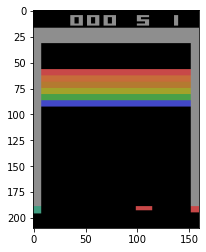

In [30]:
%matplotlib inline
plt.imshow(array)

In [31]:
# Action Space: how many actions can we execute?
env.action_space

Discrete(4)

In [32]:
env.action_space.n

4

In [33]:
# Let's render the game executing random actions
# A windw opens and displays the random game
# First, we need to always reset it to the initial state
_ = env.reset()
for step in range(200):
    env.render("human")
    # Random action (int), chosen uniformly
    # look at github/code the meaning of actions
    random_action = env.action_space.sample()
    # We performa steo passing the action
    # and we get 4 objects:
    # - observation
    # - reward given
    # - whether the game is finished
    # - game specific info
    observation, reward, done, info = env.step(random_action)
    print(f'Reward: {reward}')
    print(f'Done: {done}')
    print(f'Info: {info}')
    if done: #eg, if we run out of lives
        break
    # I we want to visualize it, we need to slow it down
    time.sleep(0.1)
env.close()    

2022-01-10 12:22:38.453 python[44936:1910886] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fef8d81e370>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 12:22:38.453 python[44936:1910886] Warning: Expected min height of view: (<NSButton: 0x7fef6cf80b80>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 12:22:38.455 python[44936:1910886] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fef6cf81310>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 12:22:38.456 python[44936:1910886] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fef6cf82090>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0
Done: False
Info: {'lives': 5}
Reward: 0.0

## 2. Mountain Car

A very famous testbed published by Moore in 1990: "A car is on a one-dimensional track, positioned between two mountains. The goal is to drive up the mountain on the right; however, the car's engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum."

[MountainCar-v0](https://gym.openai.com/envs/MountainCar-v0/)

[Github link](https://github.com/openai/gym/blob/master/gym/envs/classic_control/mountain_car.py)

In [34]:
import gym

In [35]:
import time

In [37]:
env_name = 'MountainCar-v0'
env = gym.make(env_name)

In [38]:
# Look in the code to understand the meaning of the actions
# https://github.com/openai/gym/blob/master/gym/envs/classic_control/mountain_car.py
# 0: accelerate to the left
# 1: stay put
# 2: accelerate to the right
env.action_space

Discrete(3)

In [49]:
# According to the docs, starting pos is random-uniformly assigned
# in a range; we can control the random seed
env.seed(42)
# We reset all internal values
observation = env.reset()

for step in range(50):
    env.render(mode="human")
    # We hard-code for now the action to accelerate to the right
    action = 2
    observation, reward, done, info = env.step(action)
    #print(f'Observation: {observation}')
    print(f'Position: {observation[0]}')
    print(f'Velocity: {observation[1]}')
    time.sleep(0.1)
env.close()

2022-01-10 12:50:08.202 python[44936:1910886] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fef8d85b4c0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 12:50:08.203 python[44936:1910886] Warning: Expected min height of view: (<NSButton: 0x7fef6cf7eea0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 12:50:08.204 python[44936:1910886] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fef6cf9ff50>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 12:50:08.206 python[44936:1910886] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fef6cfa0d10>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


Position: -0.5241595506668091
Velocity: 0.001011794083751738
Position: -0.522143542766571
Velocity: 0.0020159997511655092
Position: -0.5191384553909302
Velocity: 0.00300508551299572
Position: -0.5151668190956116
Velocity: 0.003971633967012167
Position: -0.5102584362030029
Velocity: 0.004908401053398848
Position: -0.5044500231742859
Velocity: 0.005808374844491482
Position: -0.49778521060943604
Velocity: 0.0066648381762206554
Position: -0.4903137683868408
Velocity: 0.007471430115401745
Position: -0.4820915460586548
Velocity: 0.008222207427024841
Position: -0.4731798470020294
Velocity: 0.008911706507205963
Position: -0.4636448621749878
Velocity: 0.009535005316138268
Position: -0.4535570740699768
Velocity: 0.010087771341204643
Position: -0.4429907500743866
Velocity: 0.010566315613687038
Position: -0.43202313780784607
Velocity: 0.01096763089299202
Position: -0.4207337200641632
Velocity: 0.011289420537650585
Position: -0.40920358896255493
Velocity: 0.011530118994414806
Position: -0.397514700

### Agent

Now iwe create a simple agent which is supposed to take decisions.

In [ ]:
def simple_agent(observation):
    # Observation
    position, velocity = observation
    # When to go right
    if 
    # When to go left
    # When to do nothing